In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [3]:
# The filtering based on hotspots.
filter_version = 'excluding'  # 'including', 'excluding', 'only'

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels for 3 species

In [4]:
def get_indels(filter_version, alignment='chrM'):
    # File paths.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    # Test input.
    if filter_version not in INDEL_PREFIX.keys():
        ValueError('# Filter version not found')
    # The 3 species.
    list_species = ['mouse','macaque','human']
    # Combine indels for the three species.
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)
    return df_indels

df_indels = get_indels(filter_version, alignment)
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,original,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,1
1,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,original,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,1
2,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,original,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423,1
3,chrM,9841,G,GT,SB=2.14678;AF=0.00152439;AC=0,SRR10068710,.:1:0.00152439:2.14678,mouse,1.0,0.001524,...,original,NaN,germline,Germline de novo,9841_G_GT,Unique to Individual,G133p3_9841,non-D-loop,15423,1
4,chrM,2454,TG,T,SB=1.67393;AF=0.00131406;AC=0,SRR10068715,.:1:0.00131406:1.67393,mouse,1.0,0.001314,...,original,NaN,somatic,Somatic de novo,2454_TG_T,Unique to Individual,G133p1_2454,non-D-loop,15423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,relin,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447,1
114,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,relin,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,1
115,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,1
116,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,relin,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,1


# Histogram of indels along mtDNA

including


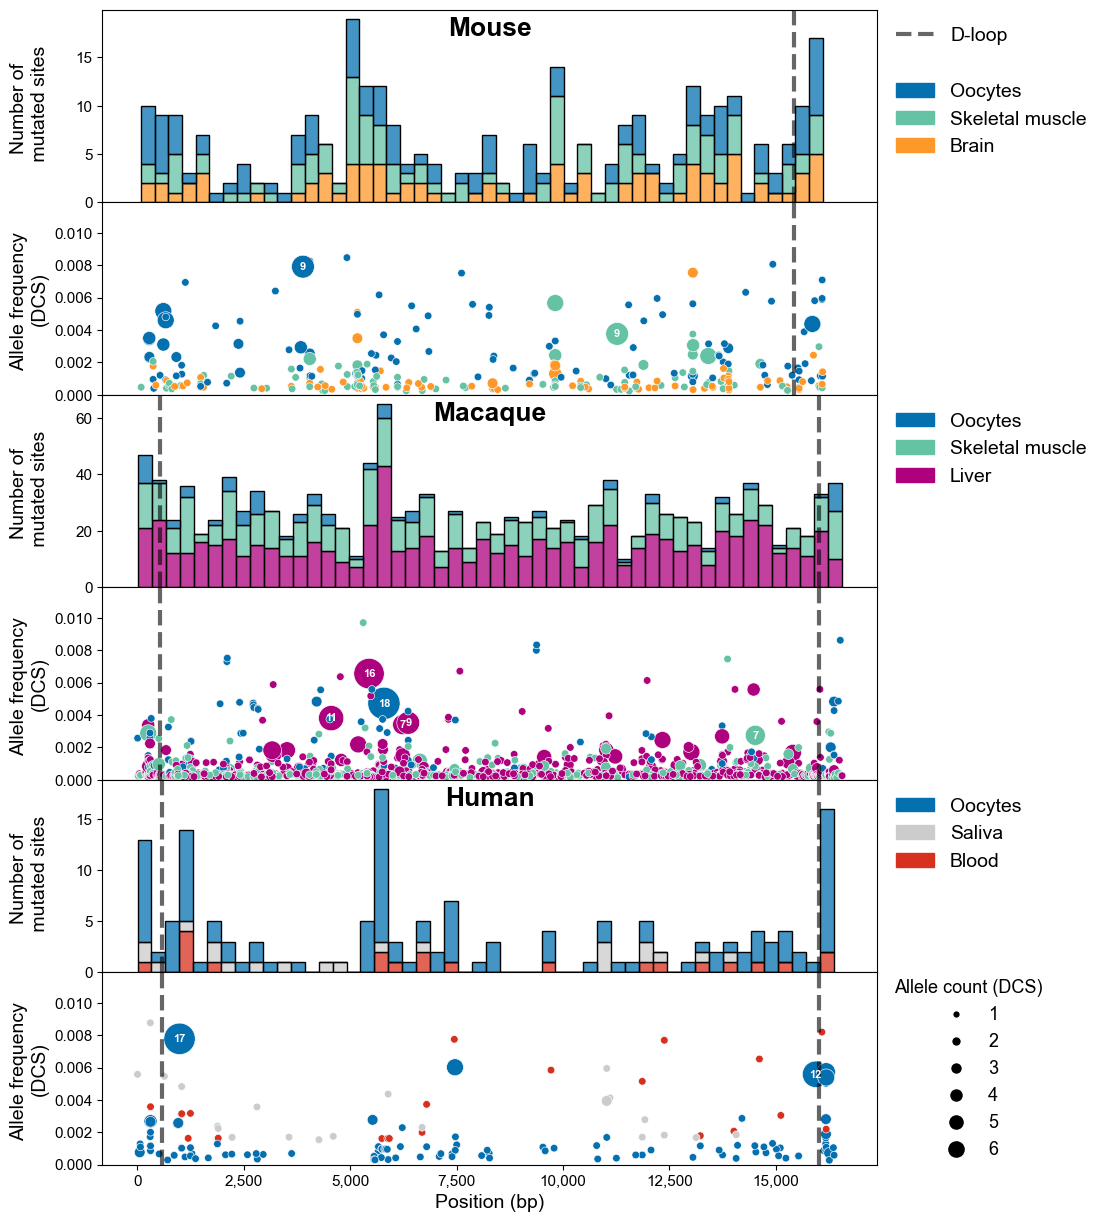

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

def scale_marker_size(ac, max_size=34, min_size=1):
    """Scale marker size based on AC."""
    unit = 30
    return unit*ac


def plot_maf_mutations(filter_version, alignment='chrM', write=True):
    # data = df_mutations.copy()
    data = get_indels(filter_version, alignment=alignment)

    data['Allele count'] = data['AC'].astype(int)
    data['Allele frequency'] = data['AF']
    
    # Seaborn parameters.
    gridspec = dict(hspace=0.0, height_ratios=[1, 1, 1, 1, 1, 1])
    fig, axes = plt.subplots(6, 1, sharex=True, figsize=[10, 15], 
                             gridspec_kw=gridspec)

    # Compute the global maximum log-transformed AC for consistent scaling.
    all_AC = data['Allele count']
    global_max_ac_log = np.log10(all_AC + 1).max()

    # Pre-compute global sizes dictionary.
    global_sizes = {ac: scale_marker_size(ac)
                    for ac in all_AC.drop_duplicates()}

    for i, species in zip([0, 2, 4], ['mouse', 'macaque', 'human']):
        # Filter by species.
        df = data[data['Species'] == species].copy()

        # Change names.
        dict_tissues = {
            'Oo': 'Oocytes', 'M': 'Skeletal muscle', 'Br': 'Brain',
            'Li': 'Liver', 'Sa': 'Saliva', 'Bl': 'Blood'
        }
        df['Tissue'] = df['Tissue'].map(dict_tissues)
        df['Species'] = df['Species'].str.capitalize()
    
        # Mutations only considered once.
        df = df.drop_duplicates(subset=['Species', 'Tissue', 'POS', 'REF', 'ALT'])

        # HISTOGRAM
        sns.histplot(
            ax=axes[i], data=df, x="POS", hue="Tissue",
            hue_order=['Oocytes', 'Skeletal muscle', 'Brain', 'Liver', 'Saliva', 'Blood'],
            bins=50, linewidth=1, multiple="stack",
            palette={
                'Oocytes': '#0570b0', 'Skeletal muscle': '#66c2a4',
                'Brain': '#fe9929', 'Liver': '#ae017e',
                'Blood': '#d7301f', 'Saliva': '#cccccc'
            },
            legend=None
        )

        # SCATTER PLOT
        sns.scatterplot(
            ax=axes[i + 1], data=df, x="POS", y="Allele frequency",
            hue="Tissue", size="Allele count", sizes=global_sizes,
            palette={
                'Oocytes': '#0570b0', 'Skeletal muscle': '#66c2a4',
                'Brain': '#fe9929', 'Liver': '#ae017e',
                'Blood': '#d7301f', 'Saliva': '#cccccc'
            },
            legend=None
        )

        # D-loop coordinates in Mouse, Macaque, and Human.
        def coordinates_dloop(species):
            if species == 'mouse':
                coords_dloop = [ [15424,16300] ]
                coords_non = [ [1,15423] ]
            elif species == 'macaque':
                coords_dloop = [ [1,535],[16015,16564] ]
                coords_non = [ [536,16014] ]
            elif species == 'human':
                coords_dloop = [ [1,576],[16024,16569] ]
                coords_non = [ [577,16023] ]
            else:
                ValueError("### Species not recognized ###")
            return { 'D-loop':coords_dloop , 'non-D':coords_non}

        # D-loop coordinates for species.
        coords = coordinates_dloop(species)['D-loop']
        # Vertical dashed lines for D-loop.
        for coord in coords:
            for value in coord:
                if value not in [1, 16300, 16564, 16569]:
                    axes[i].axvline(x=value, color="black", linestyle='--', linewidth=3, alpha=0.6)
                    axes[i + 1].axvline(x=value, color="black", linestyle='--', linewidth=3, alpha=0.6)

        # # OriL coordinates.
        # dict_coords_ori = {
        #     'mouse': [5160, 5191], 'macaque': [5681, 5713], 'human': [5723,5780]
        # }
        # coords_ori = dict_coords_ori[species]
        # # Vertical dashed lines for OriL.
        # for coord in coords_ori:
        #     if coord not in [1, 16300, 16564, 16569]:
        #         axes[i].axvline(x=coord, color="black", linestyle=':', linewidth=2, alpha=0.6)
        #         axes[i + 1].axvline(x=coord, color="black", linestyle=':', linewidth=2, alpha=0.6)


        # Change axis labels.
        legend_fontsize = 14
        axes[i].set_ylabel("Number of \n mutated sites\n", fontsize=legend_fontsize)
        axes[i + 1].set_ylabel("Allele frequency \n(DCS)", fontsize=legend_fontsize)
        # Adjust tick label size
        axes[i].tick_params(axis='both', labelsize=11)  # For both x and y ticks
        axes[i + 1].tick_params(axis='both', labelsize=11)  # For both x and y ticks

        # Adjust axis limits.
        axes[i + 1].set_ylim(0, 0.0119)
        if "chrM" in alignment:
            if 'including' in filter_version:
                # axes[0].set_ylim(0, 19)
                # axes[2].set_ylim(0, 75)
                # axes[4].set_ylim(0, 29)
                pass
            elif 'excluding' in filter_version:
                # axes[0].set_ylim(0, 19)
                # axes[2].set_ylim(0, 49)
                axes[4].set_ylim(0, 14)
                pass
            elif 'only' in filter_version:
                # axes[0].set_ylim(0, 19)
                # axes[2].set_ylim(0, 29)
                axes[4].set_ylim(0, 9)
                pass

        # Subplot titles.
        axes[i].set_title(species.capitalize(), y=0.82, weight="bold", size=19)

        # Legend for scatter plots.
        # Limit the number of markers shown in the legend
        # legend_values = sorted(global_sizes.keys())[::3]  # Show every 3rd AC value, adjust as needed
        legend_values = { 1:5.5, 2:7, 3:8.5, 4:10, 5:11.5, 6:13 }
        legend_handles = [
            Line2D(
                [0], [0], marker='o', color='w', label=str(ac),
                markerfacecolor='black', markersize=legend_values[ac]  #scale_marker_size(ac)
            ) for ac in legend_values.keys()
        ]
        axes[5].legend(
            handles=legend_handles, bbox_to_anchor=(1, 1.05 ),
            framealpha=0.0, fontsize=13,
            title="Allele count (DCS)", title_fontsize=13
        )
        # SCATTER PLOT with AC values as markers, skipping if AC == 1
        for _, row in df.iterrows():
            if row['Allele count'] <= 6:
                continue  # Skip this marker if AC <= 6
            else:
                axes[i + 1].annotate(
                    text=str(row['Allele count']),  # Use AC value as text
                    xy=(row['POS'], row['Allele frequency']),  # Position of the marker
                    fontsize=8,  # Adjust font size as needed
                    ha='center', va='center',  # Center the text
                    color='white', weight='bold',  # Adjust color if needed
                )
        def format_with_commas(x, _):
            return f"{int(x):,}"

        # Apply the formatter to the x-axis
        axes[-1].xaxis.set_major_formatter(FuncFormatter(format_with_commas))
        axes[-1].set_xlabel('Position (bp)', size=legend_fontsize)


    dict_palettes = {
        'Oocytes': '#0570b0', #['#f1eef6','#bdc9e1','#74a9cf','#0570b0'], #blues2
        'Skeletal muscle': '#66c2a4', #['#edf8fb','#b2e2e2','#66c2a4','#238b45'], #greens2
        'Brain': '#fe9929', #['#ffffd4','#fed98e','#cc4c02','#fe9929'], #oranges2
        'Liver': '#ae017e', #['#feebe2','#fbb4b9','#f768a1','#ae017e'], #violets
        'Blood': '#d7301f', #['#fef0d9','#fdcc8a','#fc8d59','#d7301f'], #reds2
        'Saliva': '#cccccc', #['#f7f7f7','#cccccc','#969696','#525252'], #blacks
        'deletions': '#d7301f', #['#fef0d9','#fdcc8a','#fc8d59','#d7301f'], #reds2
        'insertions': '#2171b5' #['#eff3ff','#bdd7e7','#6baed6','#2171b5'] #blues
    }

    # Add legend for the vertical dashed line representing D-loop
    oriL_line = Line2D([0], [0], color='black', linestyle='--', linewidth=3, alpha=0.6, label='D-loop')
    empty_patch = mpatches.Patch(color='white', label='')

    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Skeletal muscle'], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=dict_palettes['Brain'], label='Brain')
    # axes[0].legend(
    #     handles=[first_patch,second_patch,third_patch], 
    #     bbox_to_anchor=(1.275, 0.8), framealpha=0.0, fontsize=legend_fontsize
    #     )
    axes[0].legend(handles=[oriL_line, empty_patch, first_patch, second_patch, third_patch], bbox_to_anchor=(1.001, 1), framealpha=0.0, fontsize=legend_fontsize)

    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Skeletal muscle'], label='Skeletal muscle')
    third_patch = mpatches.Patch(color=dict_palettes['Liver'], label='Liver')
    axes[2].legend(
        handles=[first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.001, 1), framealpha=0.0, fontsize=legend_fontsize
        )
    first_patch = mpatches.Patch(color=dict_palettes['Oocytes'], label='Oocytes')
    second_patch = mpatches.Patch(color=dict_palettes['Saliva'], label='Saliva')
    third_patch = mpatches.Patch(color=dict_palettes['Blood'], label='Blood')
    axes[4].legend(
        handles=[first_patch,second_patch,third_patch], 
        bbox_to_anchor=(1.001, 1), framealpha=0.0, fontsize=legend_fontsize
        )
    # axes[3].axvline(x=5307)  # AC=1
    # axes[3].axvline(x=11021) # AC=34
    # axes[3].axvline(x=12340) # AC=1
    # axes[5].axvline(x=954)   # AC=
    
    print(filter_version)

    if write:
        fig_num = { 'including':'4', 'excluding':'S4', 'only':'S5' }[filter_version]
        # Export as vectorized image.
        fig.savefig( f'plots/pdf/figure{fig_num}_histogram_loci_{alignment}_{filter_version}Hotspots.pdf', bbox_inches='tight', format='pdf', dpi=1200)
        fig.savefig( f'plots/png/figure{fig_num}_histogram_loci_{alignment}_{filter_version}Hotspots.png', bbox_inches='tight', format='png', dpi=1200)


# Call the function
plot_maf_mutations('including')

## Excluding hotspots

excluding


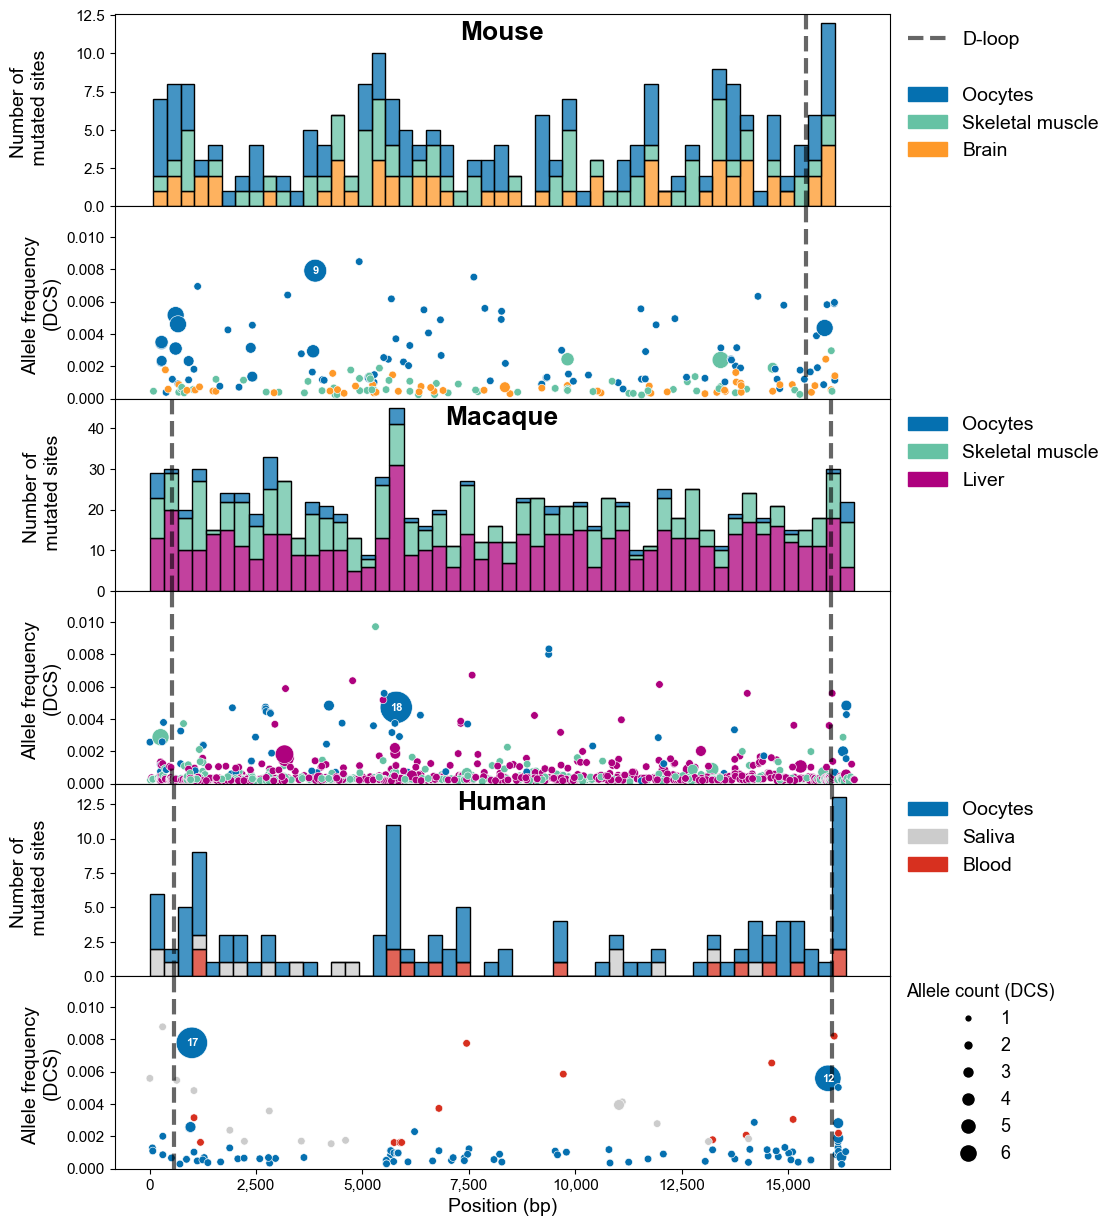

In [30]:
plot_maf_mutations('excluding')

## Only hotspots

only


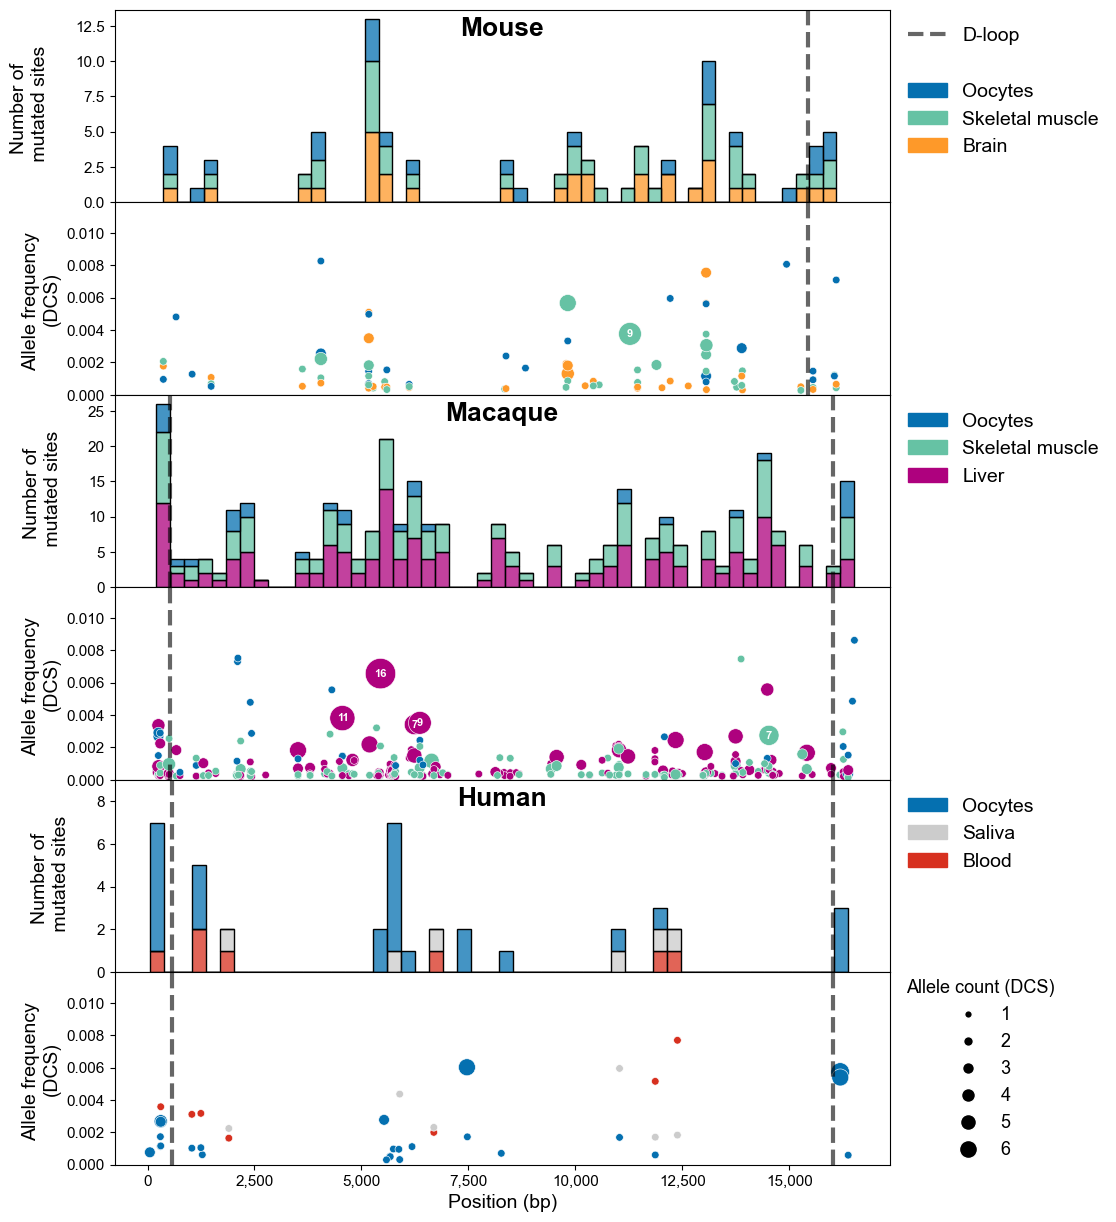

In [31]:
plot_maf_mutations('only')

In [27]:
df_indels[['Species','AC']].max()
df_indels[df_indels['AC']==2]
# df_indels[['Species','AF']].max()
# df_indels[df_indels['AF']>0.008]
df_indels[df_indels['POS']==954]

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
115,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,1


In [28]:
df_indels[(df_indels['POS']>200)&(df_indels['POS']<300)&(df_indels['Species']=='macaque')].sort_values('POS')

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Individuals_Share
1028,chrM,219,T,TCATGCTA,SB=2.38897;AF=0.000263713;AC=0,SRR16770769,.:1:0.000263713:2.38332,macaque,1.0,0.000264,...,relin,8384.0,somatic,Somatic de novo,219_T_TCATGCTA,NaN,Rh020_219,D-loop,1085,1
1029,chrM,246,A,AT,SB=2.4814;AF=0.000283206;AC=0,SRR16770973,.:1:0.000283206:2.4814,macaque,1.0,0.000283,...,relin,8411.0,somatic,Somatic de novo,246_A_AT,NaN,Rh081_246,D-loop,1085,1
1030,chrM,253,C,CCAACACCACA,SB=2.62771;AF=0.00124844;AC=0,SRR16770998,.:1:0.00124844:2.62771,macaque,1.0,0.001248,...,relin,8418.0,somatic,Somatic de novo,253_C_CCAACACCACA,NaN,Rh015_253,D-loop,1085,1
1031,chrM,253,C,CCAACA,SB=2.8152;AF=0.000286451;AC=0,SRR16770911,.:1:0.000286451:2.8152,macaque,1.0,0.000286,...,relin,8418.0,somatic,Somatic de novo,253_C_CCAACA,NaN,Rh029_253,D-loop,1085,1
1032,chrM,255,G,GACACCACACCACACCACACCACACCACACCACACC,SB=1.30781;AF=0.00154799;AC=0,SRR16770989,.:1:0.000201369:0.686156,macaque,1.0,0.000201,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACACCACACCACACCACACCACACCACACC,NaN,Rh068_255,D-loop,1085,2
1033,chrM,255,G,GACACCACACCACACCACACC,SB=1.30781;AF=0.0655738;AC=0,SRR16770935,.:1:0.000364432:0.519465,macaque,1.0,0.000364,...,relin,8420.0,germline,Germline de novo,255_G_GACACCACACCACACCACACC,NaN,Rh094_255,D-loop,1085,2
1034,chrM,255,GACACCACACC,G,SB=2.20249;AF=0.000237812;AC=0,SRR16770975,.:1:0.00134409:2.20249,macaque,1.0,0.001344,...,relin,8420.0,somatic,Somatic de novo,255_GACACCACACC_G,NaN,Rh081_255,D-loop,1085,2
1035,chrM,255,G,GACACCACACCACACCACACCACACCACACCACACCACACCACACC...,SB=2.26789;AF=0.000576701;AC=0,SRR16770858,.:1:0.000576701:1.33621,macaque,1.0,0.000577,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACACCACACCACACCACACCACACCACACCACAC...,NaN,Rh066_255,D-loop,1085,2
1036,chrM,255,GACACCACACC,G,SB=2.20249;AF=0.000237812;AC=0,SRR16770985,.:1:0.000237812:2.41521,macaque,1.0,0.000238,...,relin,8420.0,somatic,Somatic de novo,255_GACACCACACC_G,NaN,Rh017_255,D-loop,1085,2
1037,chrM,255,G,GACACCACACCACACCACACC,SB=1.30781;AF=0.0655738;AC=0,SRR16770975,.:1:0.00134409:2.20249,macaque,1.0,0.001344,...,relin,8420.0,somatic,Somatic de novo,255_G_GACACCACACCACACCACACC,NaN,Rh081_255,D-loop,1085,2


In [29]:
df_indels['Mutation_ID'].value_counts()

Mutation_ID
7920_CA_C                  3
5616_TG_T                  2
1138_AC_A                  2
3934_GC_G                  2
3502_GCCCTCCTCCTATGAA_G    2
                          ..
12645_A_AGC                1
16187_CT_C                 1
1070_T_TC                  1
991_TA_T                   1
2022_T_TA                  1
Name: count, Length: 1300, dtype: int64